Smooth the Thalweg

In [1]:
from __future__ import division
import matplotlib.pylab as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
%matplotlib inline

In [3]:
nc_filepath = '../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
bathy = nc.Dataset(nc_filepath, 'r')
depths = bathy.variables['Bathymetry']
lats = bathy.variables['nav_lat'][:]
lons = bathy.variables['nav_lon'][:]

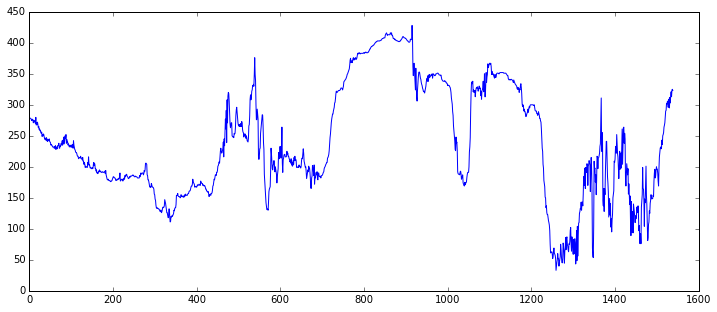

In [7]:
lines = np.loadtxt('thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
depthT = depths[lines[:,0],lines[:,1]]
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(depthT)

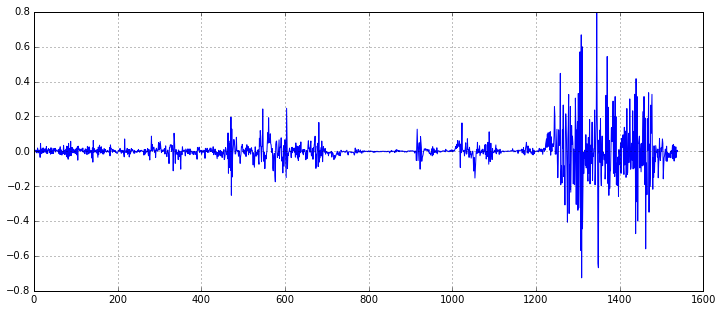

In [12]:
normdepth = np.empty_like(depthT)
for i in range(depthT.shape[0]-1):
    diff = depthT[i] - depthT[i+1]
    avg = 0.5*(depthT[i] + depthT[i+1])
    normdepth[i] = diff/avg
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(normdepth)
ax.grid()

Thalweg is "smooth" to 0.33 through the southern Islands.  Only jagged in the north.  Don't bother smoothing for now.